# Regression and Viennese trees

**Some self-learning**

I did this regression task as self-study notebook that was an assignment in my uni program, for deeper understanding of lasso, kNN and decision trees. The dataset used here is an opened one about trees of Vienna.

## Read data

In [ ]:
# As usual, let's first import standard libraries we will use in this notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


We read the "Baumkataster" data downloaded from [data.gv.at](https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:BAUMKATOGD&srsName=EPSG:4326&outputFormat=csv), which has information on trees in Vienna.


In [94]:
datapath = '/Users/yuliia.drevnytska/Python/Project-1/Datasets/Vienna_trees/'

trees = pd.read_csv(datapath + 'BAUMKATOGD.csv')


## Initial inspection

In [95]:
trees.shape

(22671, 19)

So we have information on more than 50.000 trees in 19 columns.

Let's start with a summary..

In [96]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22671 entries, 0 to 22670
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FID                    22671 non-null  object 
 1   OBJECTID               22671 non-null  int64  
 2   SHAPE                  22670 non-null  object 
 3   BAUM_ID                22670 non-null  float64
 4   DATENFUEHRUNG          22670 non-null  object 
 5   BEZIRK                 22670 non-null  float64
 6   OBJEKT_STRASSE         22670 non-null  object 
 7   GEBIETSGRUPPE          22670 non-null  object 
 8   GATTUNG_ART            22670 non-null  object 
 9   PFLANZJAHR             22670 non-null  float64
 10  PFLANZJAHR_TXT         22670 non-null  object 
 11  STAMMUMFANG            22670 non-null  float64
 12  STAMMUMFANG_TXT        22670 non-null  object 
 13  BAUMHOEHE              22670 non-null  float64
 14  BAUMHOEHE_TXT          22670 non-null  object 
 15  KR

We see that we 8 numeric variables and 11 object attributes (strings), which we may need to convert or treat as categoricals.

Next, let's get some descriptive statistics:

In [97]:
trees.describe()

,OBJECTID,BAUM_ID,BEZIRK,PFLANZJAHR,STAMMUMFANG,BAUMHOEHE,KRONENDURCHMESSER,SE_ANNO_CAD_DATA
count,2.267100e+04,22670.000000,22670.00000,22670.000000,22670.000000,22670.000000,22670.000000,0.0
mean,6.114530e+08,204932.978341,14.66030,1441.509881,94.017644,2.131584,2.182267,NaN
std,3.655003e+06,113173.061127,6.91819,892.333144,72.534142,1.076796,1.219572,NaN
min,6.114888e+07,27.000000,1.00000,0.000000,0.000000,0.000000,0.000000,NaN
25%,6.114724e+08,104434.250000,10.00000,0.000000,37.000000,1.000000,1.000000,NaN
50%,6.114781e+08,218069.500000,15.00000,1984.000000,82.000000,2.000000,2.000000,NaN
75%,6.114839e+08,301515.250000,21.00000,2011.000000,130.000000,3.000000,3.000000,NaN
max,6.114904e+08,385820.000000,23.00000,2024.000000,1773.000000,8.000000,8.000000,NaN


Let's also look at the categoricals..

In [98]:
trees.describe(include=object)

,FID,SHAPE,DATENFUEHRUNG,OBJEKT_STRASSE,GEBIETSGRUPPE,GATTUNG_ART,PFLANZJAHR_TXT,STAMMUMFANG_TXT,BAUMHOEHE_TXT,KRONENDURCHMESSER_TXT,BAUMNUMMER
count,22671,22670,22670,22670,22670,22670,22670,22670,22670,22670,22670
unique,22671,22669,1,2359,39,394,177,461,9,9,3517
top,BAUMKATOGD.611468744,POINT (16.36533317498124 48.16576314845242),magistrat,Wagramer Straße,"MA 28 - Straße, Grünanlage",Acer platanoides (Spitzahorn),nicht definiert,20 cm,6-10 m,0-3 m,1
freq,1,2,22670,687,10009,1929,6277,726,8072,7077,175


In [99]:
trees.head()

,FID,OBJECTID,SHAPE,BAUM_ID,DATENFUEHRUNG,BEZIRK,OBJEKT_STRASSE,GEBIETSGRUPPE,GATTUNG_ART,PFLANZJAHR,PFLANZJAHR_TXT,STAMMUMFANG,STAMMUMFANG_TXT,BAUMHOEHE,BAUMHOEHE_TXT,KRONENDURCHMESSER,KRONENDURCHMESSER_TXT,BAUMNUMMER,SE_ANNO_CAD_DATA
0,BAUMKATOGD.611468744,611468744,POINT (16.336248373203553 48.15995651953328),159296.0,magistrat,10.0,Gutheil-Schoder-Gasse,"MA 28 - Straße, Grünanlage",Fraxinus ornus 'Obelisk' (Säulenblumenesche),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,3010,NaN
1,BAUMKATOGD.611468745,611468745,POINT (16.31686139395805 48.17889692520752),247773.0,magistrat,12.0,"12., Parkanlage Steinweisweg, MA42",MA 42 - Parkanlage,Acer platanoides (Spitzahorn),0.0,nicht definiert,80.0,80 cm,2.0,6-10 m,2.0,4-6 m,3014/B,NaN
2,BAUMKATOGD.611468746,611468746,POINT (16.33872103253534 48.18423156492829),108049.0,magistrat,12.0,Malfattigasse,"MA 28 - Straße, Grünanlage",Tilia cordata (Winterlinde),1965.0,1965,116.0,116 cm,3.0,11-15 m,2.0,4-6 m,2001,NaN
3,BAUMKATOGD.611468747,611468747,POINT (16.386361439145805 48.14407518497054),371578.0,magistrat,10.0,Hasenöhrlstraße,"MA 28 - Straße, Grünanlage",Pyrus calleryana 'Chanticleer' (Zierbirne),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,1016,NaN
4,BAUMKATOGD.611468748,611468748,POINT (16.388306895156575 48.14363823294071),371579.0,magistrat,10.0,Hasenöhrlstraße,"MA 28 - Straße, Grünanlage",Pyrus calleryana 'Chanticleer' (Zierbirne),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,2008,NaN


<div class="alert alert-block alert-warning">
<strong>Exercise 1 (joint task):</strong> Initial inspection
</div>

<div class="alert alert-block alert-success"> 
  From the table above it is visible that we have 50 000 rows and 19 columns. There are also 8 numeric variables and 11 object attributes. The numeric attributes provide data on the tree's age, size, and location, while the categorical columns describe  street names and tree species. Also some columns (like SE_ANNO_CAD_DATA) have missing or irrelevant data that might need further cleaning or exclusion during analysis.
In terms of categorical variables, several columns have a high number of unique values, making them high-cardinality features. For instance, there are 483 unique tree species recorded in the dataset, and the most frequent street mentioned is “Wagramer Strasse”. 
Overal, the data set will require careful preprocessing, particularly in terms of handling missing values, managing high-cardinality categorical variables, and ensuring consistency in year-based or text-represented fields.
</div>

### Missing values

Next, let's look into missing values:

In [100]:
trees.isnull().sum()

FID                          0
OBJECTID                     0
SHAPE                        1
BAUM_ID                      1
DATENFUEHRUNG                1
BEZIRK                       1
OBJEKT_STRASSE               1
GEBIETSGRUPPE                1
GATTUNG_ART                  1
PFLANZJAHR                   1
PFLANZJAHR_TXT               1
STAMMUMFANG                  1
STAMMUMFANG_TXT              1
BAUMHOEHE                    1
BAUMHOEHE_TXT                1
KRONENDURCHMESSER            1
KRONENDURCHMESSER_TXT        1
BAUMNUMMER                   1
SE_ANNO_CAD_DATA         22671
dtype: int64

The `SE_ANNO_CAD_DATA` column does not contain any data, so let's drop it.

In [101]:
trees = trees.drop('SE_ANNO_CAD_DATA', axis=1)

Other than that, we don't seem to have a lot of missing values. In fact, we have so few that we can take a look at the rows with missing values:

In [102]:
trees[trees.isnull().any(axis=1)]

,FID,OBJECTID,SHAPE,BAUM_ID,DATENFUEHRUNG,BEZIRK,OBJEKT_STRASSE,GEBIETSGRUPPE,GATTUNG_ART,PFLANZJAHR,PFLANZJAHR_TXT,STAMMUMFANG,STAMMUMFANG_TXT,BAUMHOEHE,BAUMHOEHE_TXT,KRONENDURCHMESSER,KRONENDURCHMESSER_TXT,BAUMNUMMER
22670,BAUMKATOGD.611488801,61148880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Given that there is only a single tree with incomplete information, we can drop it from the dataset before proceeding:

In [103]:
trees = trees.dropna()

.. and check to make sure we no longer have any remaining missing values in the data set (at least none that are encoded as `NaN` - we will get back to that in a minute..):

In [104]:
trees.isnull().values.any()

np.False_

### Distribution and Outliers

As a next step, let's look at the distribution of values of the various attributes and check for outliers and get an initial feel for the data.

#### Target variable

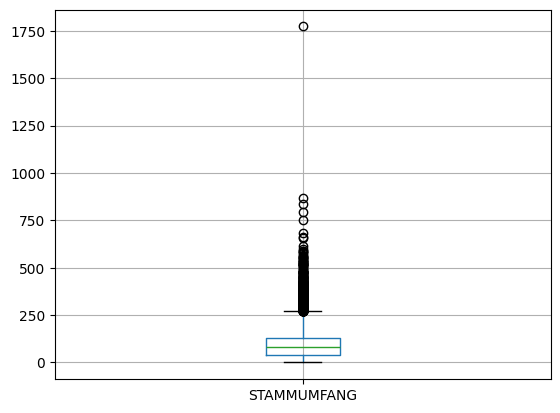

In [105]:
trees.boxplot(column=['STAMMUMFANG'])
plt.show()

In [106]:
trees[trees['STAMMUMFANG'] > 1000]

,FID,OBJECTID,SHAPE,BAUM_ID,DATENFUEHRUNG,BEZIRK,OBJEKT_STRASSE,GEBIETSGRUPPE,GATTUNG_ART,PFLANZJAHR,PFLANZJAHR_TXT,STAMMUMFANG,STAMMUMFANG_TXT,BAUMHOEHE,BAUMHOEHE_TXT,KRONENDURCHMESSER,KRONENDURCHMESSER_TXT,BAUMNUMMER
21107,BAUMKATOGD.611487320,611487320,POINT (16.316098494113852 48.22549013548353),31676.0,magistrat,17.0,Alszeile,"MA 28 - Straße, Grünanlage",Acer platanoides (Spitzahorn),1947.0,1947,1773.0,1773 cm,3.0,11-15 m,4.0,10-12 m,1004


OK, we seem to have an outlier here - a mammoth tree in the middle of the 17. district is unlikely - particularly because it is a maple and [according to Wikipedia](https://en.wikipedia.org/wiki/Maple), maples reach a trunk diameter of 1.5m (which works out to ~4.7m in circumference), this does not seem realistic, so let's discard this value:

In [107]:
trees = trees[trees['STAMMUMFANG'] < 1000]

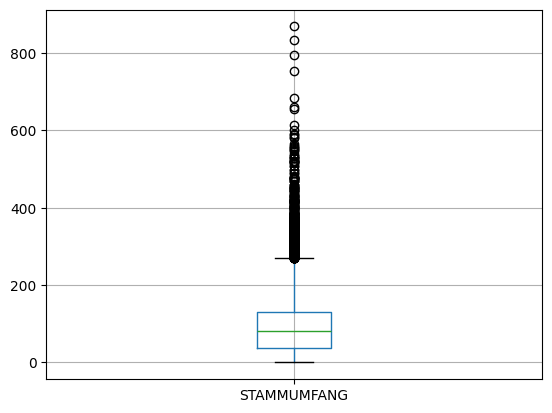

In [108]:
trees.boxplot(column=['STAMMUMFANG'])
plt.show()

#### Other numeric variables

Let's see what other numeric variables we have..

In [109]:
trees.select_dtypes(include=['int','float'])

,OBJECTID,BAUM_ID,BEZIRK,PFLANZJAHR,STAMMUMFANG,BAUMHOEHE,KRONENDURCHMESSER
0,611468744,159296.0,10.0,2023.0,20.0,1.0,1.0
1,611468745,247773.0,12.0,0.0,80.0,2.0,2.0
2,611468746,108049.0,12.0,1965.0,116.0,3.0,2.0
3,611468747,371578.0,10.0,2023.0,20.0,1.0,1.0
4,611468748,371579.0,10.0,2023.0,20.0,1.0,1.0
...,...,...,...,...,...,...,...
22665,611488796,172794.0,14.0,0.0,41.0,1.0,1.0
22666,611488797,62614.0,12.0,0.0,62.0,2.0,3.0
22667,611488798,230050.0,23.0,0.0,193.0,3.0,4.0
22668,611488799,77779.0,23.0,0.0,154.0,3.0,4.0


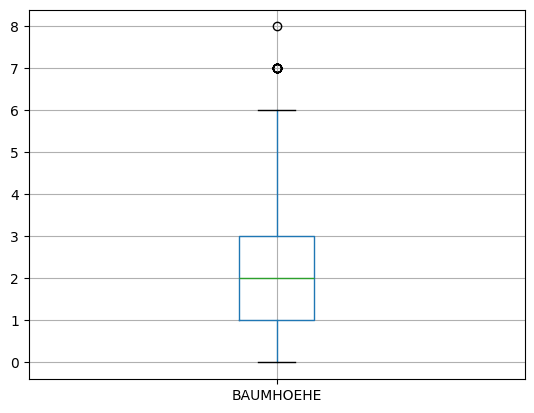

In [110]:
trees.boxplot(column=['BAUMHOEHE'])
plt.show()

Hmm - the trees do not seem particularly big if we assume that these are in m, let's take a closer look with a histogram:

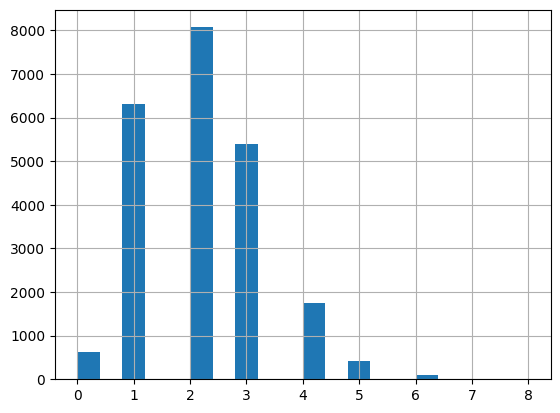

In [111]:
trees['BAUMHOEHE'].hist(bins=20)
plt.show()

OK, so according to the [description](https://www.data.gv.at/katalog/dataset/c91a4635-8b7d-43fe-9b27-d95dec8392a7) these are ordinal - i.e., they organize tree sizes into 8 ordinal categories.

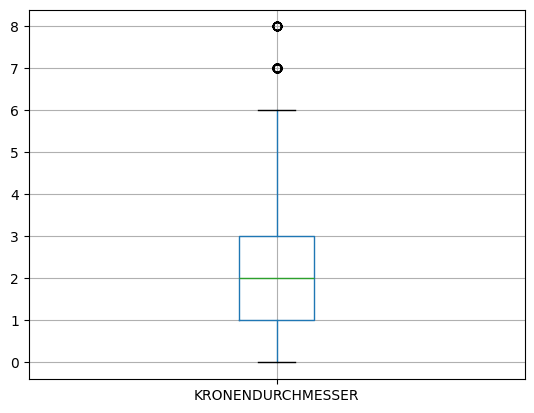

In [112]:
trees.boxplot(column=['KRONENDURCHMESSER'])
plt.show()

**Note**: According to the [description](https://www.data.gv.at/katalog/dataset/c91a4635-8b7d-43fe-9b27-d95dec8392a7) these are ordinal as well - i.e., there are 8 canopy sizes.

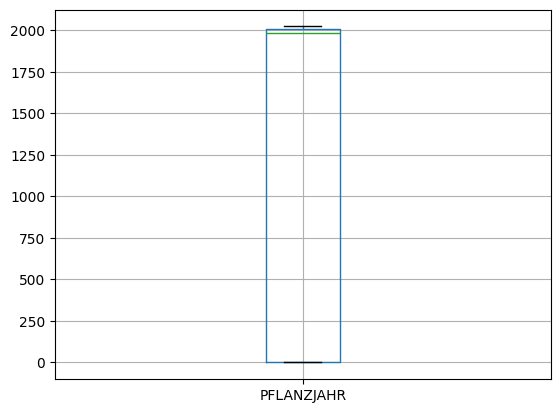

In [113]:
trees.boxplot(column=['PFLANZJAHR'])
plt.show()

This looks strange, let's take a look at a histogram:

<Axes: >

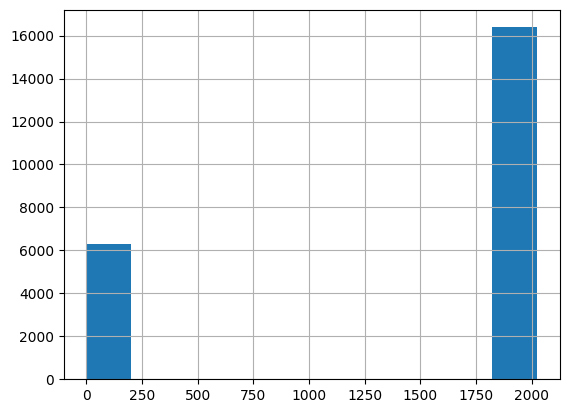

In [114]:
trees['PFLANZJAHR'].hist()

OK, so it seems unlikely that these trees were actually planted in the year 0 a.d. More likely, missing values for year planted (`PFLANZJAHR`) are simply encoded as `0` in this dataset. 

Given that the year the tree was planted will likely be useful for predicting the circumference of its trunk, we should look into that a little.

A key question - as always when dealing with missing data - is why the data is missing - i.e., is it missing completely at random (MCAR), missing at random (MAR), or missing not at random (MAR). See also the slides and read up on the topic, e.g., in the introduction of [Van Buuren (2018) - Flexible Imputation of Missing Data](https://stefvanbuuren.name/fimd/sec-MCAR.html) for an in depth discussion).

<div class="alert alert-block alert-info">
<strong>MAR vs. MCAR vs. MNAR</strong>
    
 - **MCAR:** Probability of being missing is the same for all observations, i.e., if missingness of values depends neither on the existing data, nor on the missing value, then the data are said to be missing completely at random.
    
 - **MAR**: Missingness of values does not depend on the (other) missing values or the fact that it is missing, but could depend on some observed values in the data.

 - **MNAR**: The reason for observations being missing depends on unobserved data.
</div>

First of all, let's see how bad it is, i.e., how many missing values for `PFLANZJAHR` (encoded as 0) do we have?

In [115]:
trees[trees['PFLANZJAHR'] == 0]['PFLANZJAHR'].count()

np.int64(6277)

Next, let's properly represent the missing values as `NaN`s in Pandas to avoid confusion.

In [116]:
trees['PFLANZJAHR'] = trees['PFLANZJAHR'].replace(0, np.nan)

Next, to answer the question whether the values are MCAR, MAR or MNAR, we might wonder whether the trees with missing year are different from the trees that have a planting year. Let's look at the distribution of values in the two groups using histograms.

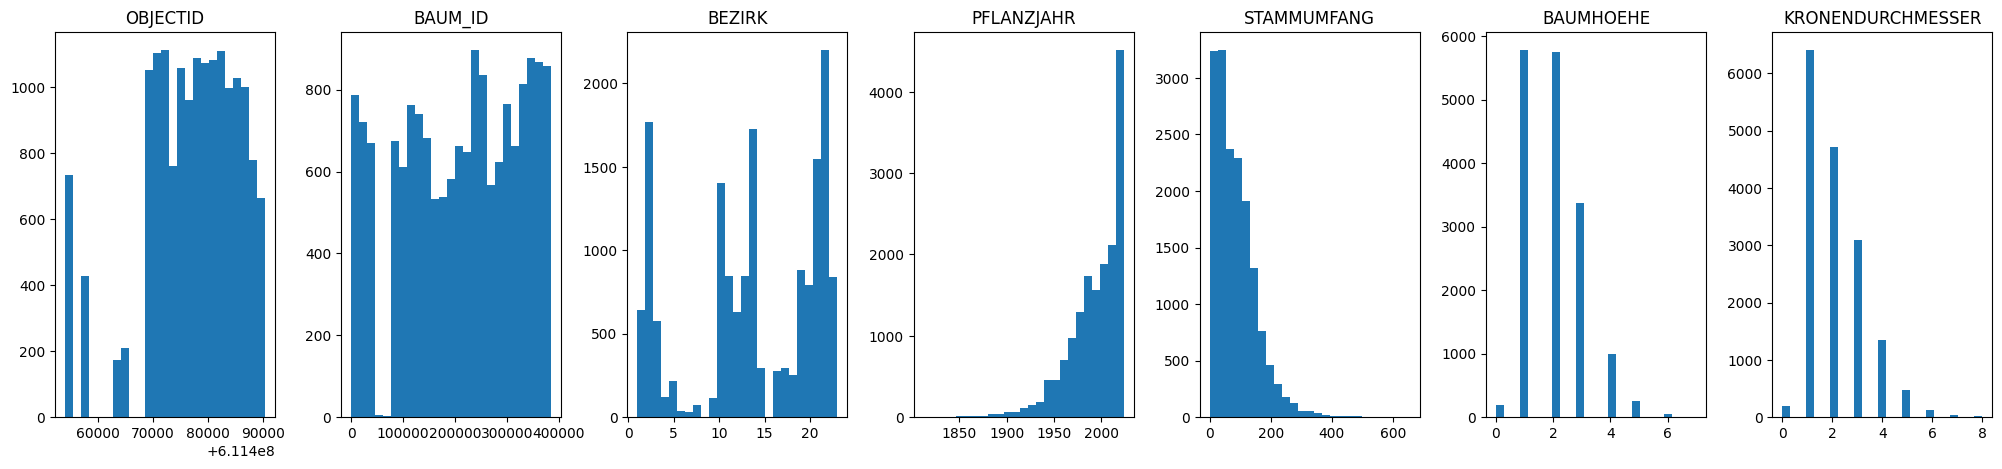

In [117]:
trees[trees['PFLANZJAHR'] > 0].hist(bins=25, grid=False, figsize=(25,5), layout=(1,7))
plt.show()

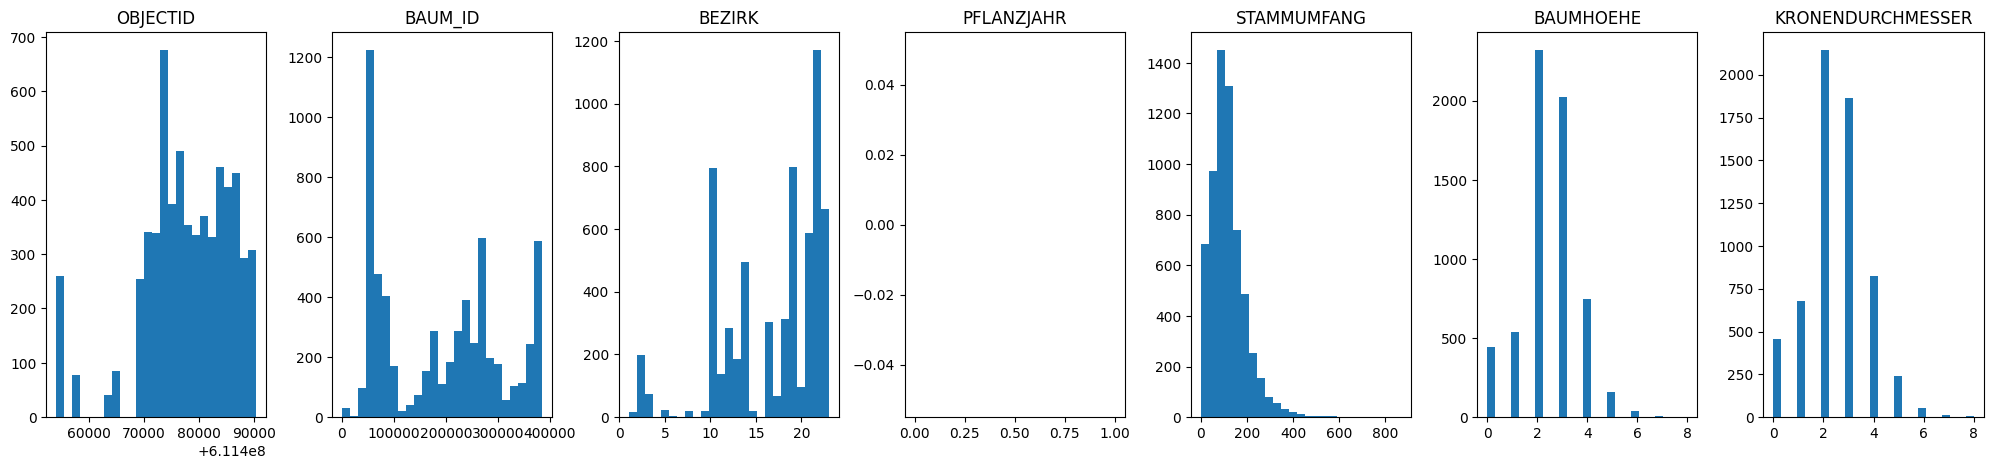

In [118]:
trees[trees['PFLANZJAHR'].isna()].hist(bins=25, grid=False, figsize=(25,5), layout=(1,7))
plt.show()

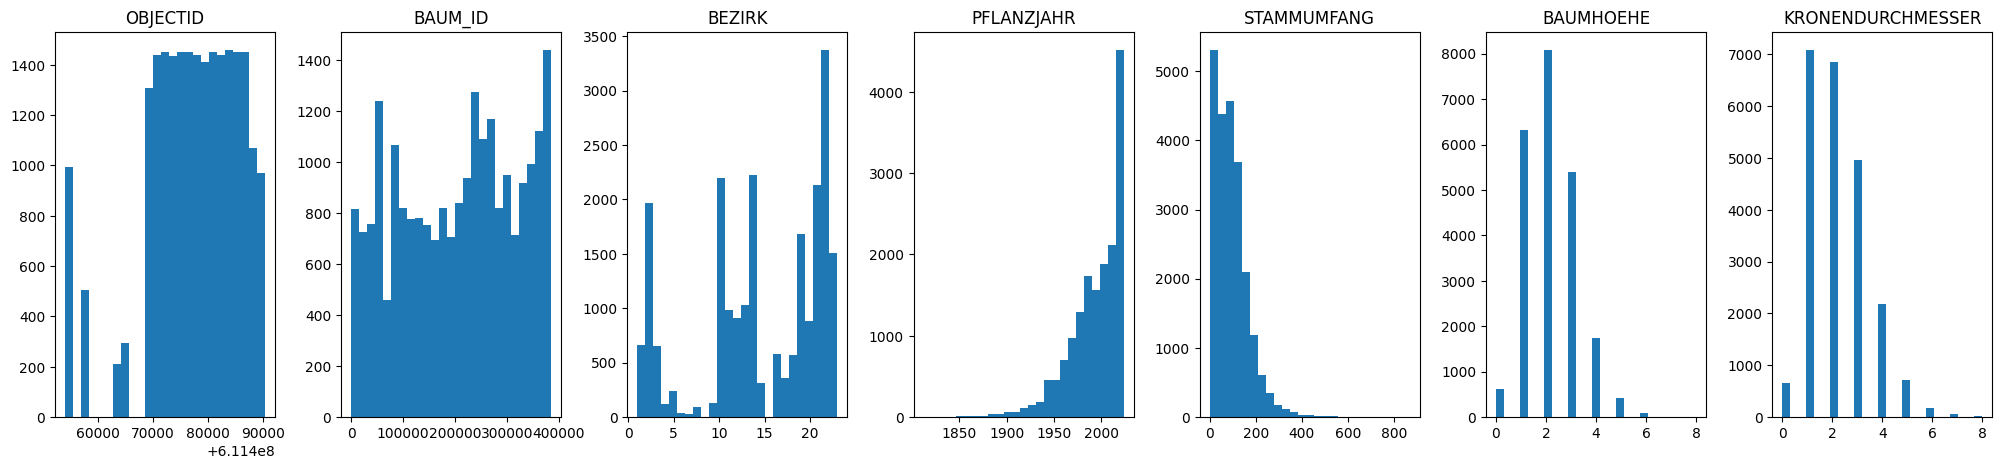

                                                    MCAR Test Values
number of missing patterns                                         2
x2                                                       1964.655087
df                                                              49.0
p                                                                0.0
alpha                                                           0.05
interpretation              **Not** Random (Potentially MAR or MNAR)


In [119]:
from missdat import mcar_test

columns= ['OBJECTID', 'BAUM_ID', 'BEZIRK', 'PFLANZJAHR','STAMMUMFANG','BAUMHOEHE','KRONENDURCHMESSER']

trees[columns] = trees[columns].apply(pd.to_numeric, errors='coerce')
trees[columns].hist(bins=25, figsize=(25,5), grid=False , layout=(1,7))
plt.show()

mcar_result = mcar_test(trees[columns])

print(mcar_result)

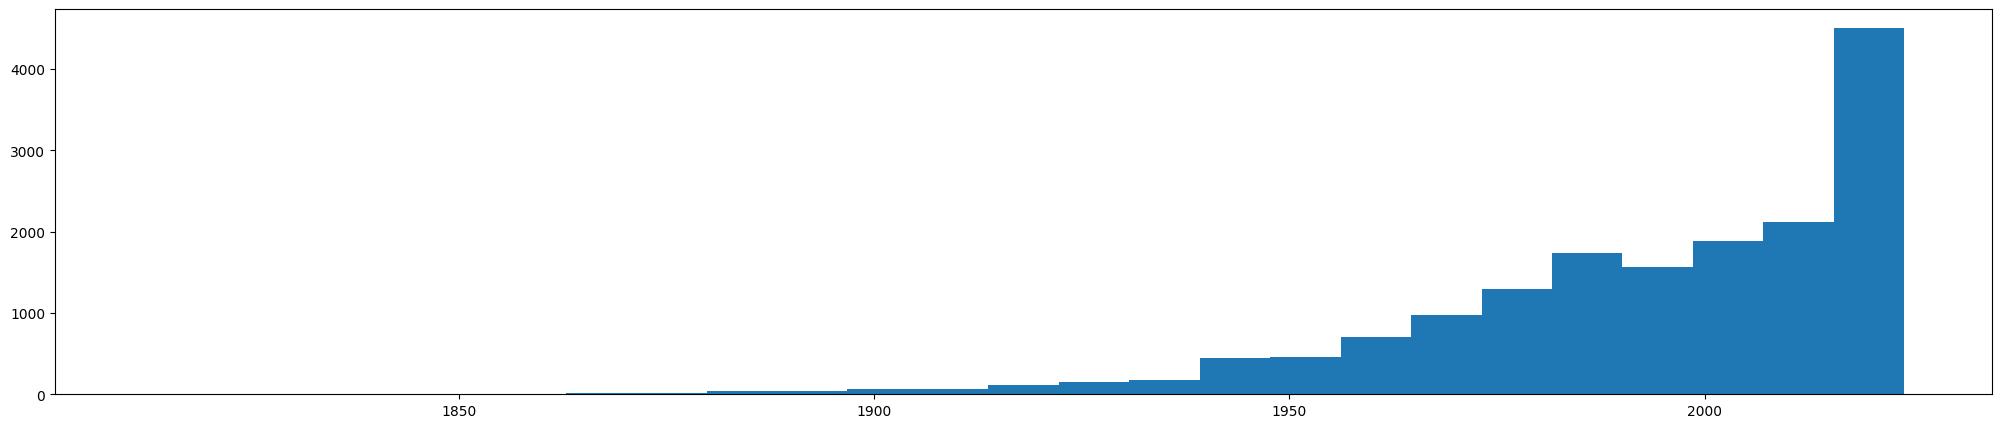

                                               MCAR Test Values
number of missing patterns                                    2
x2                                                          0.0
df                                                          1.0
p                                                           1.0
alpha                                                      0.05
interpretation              Missing Completely at Random (MCAR)


In [120]:
trees['PFLANZJAHR'] = pd.to_numeric(trees['PFLANZJAHR'], errors='coerce')

trees['PFLANZJAHR'].hist(bins=25, grid=False, figsize=(25,5))
plt.show()

mcar_result = mcar_test(trees[['PFLANZJAHR']])

print(mcar_result)

<div class="alert alert-block alert-success"> 
    
1. So, we can see that trees without a planting year seem to be a bit bigger in size, which could mean they’re older. They also show up more in certain districts, maybe because data wasn’t collected properly there.

2. If the data are MCAR, we can use simple methods like mean imputation or just drop the missing rows, and the results will still be okay. But usually, the data are MAR, which means the missing values depend on other info we have. In that case, it’s better to use smarter methods like regression imputation.

3. The method we choose can depend on the model, for example, Lasso and KNN are more sensitive to how we fill in missing values, while decision trees can handle it more easily.
    
</div>

#### Imputation methods

Implement a missing value imputation strategy below. Listwise deletion (i.e., deleting all observations with a missing value using `dropna` is the easiest, but at least also describe alternative methods that may make sense).

In [121]:
trees = trees.dropna()
trees

,FID,OBJECTID,SHAPE,BAUM_ID,DATENFUEHRUNG,BEZIRK,OBJEKT_STRASSE,GEBIETSGRUPPE,GATTUNG_ART,PFLANZJAHR,PFLANZJAHR_TXT,STAMMUMFANG,STAMMUMFANG_TXT,BAUMHOEHE,BAUMHOEHE_TXT,KRONENDURCHMESSER,KRONENDURCHMESSER_TXT,BAUMNUMMER
0,BAUMKATOGD.611468744,611468744,POINT (16.336248373203553 48.15995651953328),159296.0,magistrat,10.0,Gutheil-Schoder-Gasse,"MA 28 - Straße, Grünanlage",Fraxinus ornus 'Obelisk' (Säulenblumenesche),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,3010
2,BAUMKATOGD.611468746,611468746,POINT (16.33872103253534 48.18423156492829),108049.0,magistrat,12.0,Malfattigasse,"MA 28 - Straße, Grünanlage",Tilia cordata (Winterlinde),1965.0,1965,116.0,116 cm,3.0,11-15 m,2.0,4-6 m,2001
3,BAUMKATOGD.611468747,611468747,POINT (16.386361439145805 48.14407518497054),371578.0,magistrat,10.0,Hasenöhrlstraße,"MA 28 - Straße, Grünanlage",Pyrus calleryana 'Chanticleer' (Zierbirne),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,1016
4,BAUMKATOGD.611468748,611468748,POINT (16.388306895156575 48.14363823294071),371579.0,magistrat,10.0,Hasenöhrlstraße,"MA 28 - Straße, Grünanlage",Pyrus calleryana 'Chanticleer' (Zierbirne),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,2008
5,BAUMKATOGD.611468749,611468749,POINT (16.346827844713264 48.14329661916951),370328.0,magistrat,23.0,Laziusstraße,"MA 28 - Straße, Grünanlage",Fraxinus ornus 'Obelisk' (Säulenblumenesche),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22656,BAUMKATOGD.611490365,611490365,POINT (16.42263106262118 48.28473848398835),301509.0,magistrat,21.0,Gerasdorfer Straße,"MA 28 - Straße, Grünanlage",Ginkgo biloba (Fächerblattbaum),2018.0,2018,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,2048
22657,BAUMKATOGD.611490366,611490366,POINT (16.37555308140341 48.19857877175467),375678.0,magistrat,3.0,"03., Parkanlage Schwarzenbergplatz, MA42",MA 42 - Parkanlage,Fraxinus angustifolia 'Raywood' (Schmalblättri...,2022.0,2022,25.0,25 cm,1.0,0-5 m,1.0,0-3 m,78
22659,BAUMKATOGD.611488790,611488790,POINT (16.31211280666685 48.130400142345934),266116.0,magistrat,23.0,"23., Parkanlage Siedlung Wienerflur, MA42",MA 42 - Parkanlage,Acer griseum (Zimtahorn),2017.0,2017,11.0,11 cm,2.0,6-10 m,2.0,4-6 m,3012
22661,BAUMKATOGD.611488792,611488792,POINT (16.44265103626511 48.244654846339344),315623.0,magistrat,22.0,Steigenteschgasse,"MA 28 - Straße, Grünanlage",Tilia cordata 'Rancho' (Kleinblättrige Winterl...,2020.0,2020,28.0,28 cm,1.0,0-5 m,1.0,0-3 m,207


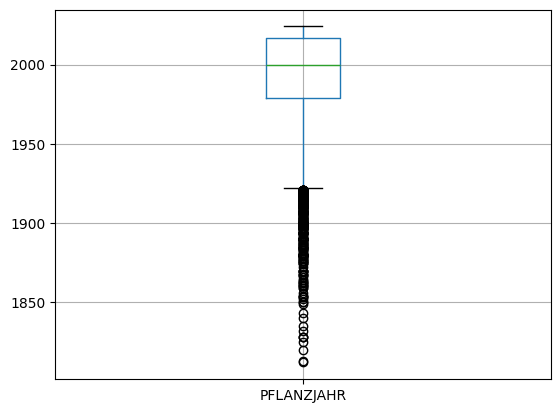

In [122]:
# OK, having dealt with our missing values for PFLANZJAHR, let's look at the distribution again:
trees.boxplot(column=['PFLANZJAHR'])
plt.show()


That should look better now..

### Categoricals

Next, let's take a look at our categoricals..

In [123]:
t = pd.DataFrame([[i,trees[i].unique(), trees[i].unique().size] for i in trees.select_dtypes(include=['object']).columns])
t.columns = ['name','unique', 'unique value count']
t   

,name,unique,unique value count
0,FID,"[BAUMKATOGD.611468744, BAUMKATOGD.611468746, B...",16392
1,SHAPE,"[POINT (16.336248373203553 48.15995651953328),...",16391
2,DATENFUEHRUNG,[magistrat],1
3,OBJEKT_STRASSE,"[Gutheil-Schoder-Gasse, Malfattigasse, Hasenöh...",2079
4,GEBIETSGRUPPE,"[MA 28 - Straße, Grünanlage, MA 42 - Betriebsf...",30
5,GATTUNG_ART,"[Fraxinus ornus 'Obelisk' (Säulenblumenesche),...",373
6,PFLANZJAHR_TXT,"[2023, 1965, 1996, 2005, 2008, 2015, 2007, 201...",176
7,STAMMUMFANG_TXT,"[20 cm, 116 cm, 107 cm, 76 cm, 57 cm, 38 cm, 3...",409
8,BAUMHOEHE_TXT,"[0-5 m, 11-15 m, 6-10 m, 16-20 m, 21-25 m, 26-...",8
9,KRONENDURCHMESSER_TXT,"[0-3 m, 4-6 m, 7-9 m, 10-12 m, 13-15 m, 16-18 ...",9


OK, `DATENFUEHRUNG` will not very useful, let's check..

In [124]:
trees["DATENFUEHRUNG"].value_counts()

DATENFUEHRUNG
magistrat    16392
Name: count, dtype: int64

Since the value is the same for all observations (i.e., variance is zero, which makes it a particularly good candidate for filter-based feature selection ;)), so let's drop it..

In [125]:
trees = trees.drop(columns=['DATENFUEHRUNG'])

The `*TXT` attributes are redundant and won't be very useful, but let's keep them for now..

#### Value counts

Let's explore a little bit the most common values we have in our categoricals:

In [126]:
trees['GATTUNG_ART'].value_counts().head(15)

GATTUNG_ART
Acer platanoides (Spitzahorn)                     1330
Celtis australis (Südlicher Zürgelbaum)            785
Aesculus hippocastanum (Rosskastanie)              736
Tilia cordata (Winterlinde)                        665
Platanus x acerifolia (Ahornblättrige Platane)     565
Tilia platyphyllos (Sommerlinde)                   506
Robinia pseudoacacia (Scheinakazie)                470
Fraxinus excelsior (Gemeine Esche)                 469
Acer pseudoplatanus (Bergahorn)                    448
Acer campestre 'Elsrijk' (Feldahorn)               407
Acer platanoides 'Columnare' (Säulenahorn)         391
Acer campestre (Feldahorn)                         375
Pyrus calleryana 'Chanticleer' (Zierbirne)         372
Sophora japonica (Schnurbaum)                      326
Pinus nigra (Schwarzkiefer, Schwarzföhre)          288
Name: count, dtype: int64

In [127]:
trees['OBJEKT_STRASSE'].value_counts().head(15)

OBJEKT_STRASSE
Wagramer Straße                      389
Schottenring                         281
02., Prater - Avenue, MA42           225
Linzer Straße                        173
13., Maxingpark, MA42                163
22., Hirschstettner Aupark, MA42     150
02., Prater - Jesuitenwiese, MA42    142
Alszeile                             142
Hütteldorfer Straße                  141
22., Donaupark, MA42                 137
14., Ferdinand-Wolf-Park, MA42       136
02., Prater - Arenawiese, MA42       118
Parkring                             118
Himberger Straße                     118
01., Rathauspark, MA42               114
Name: count, dtype: int64

In [128]:
trees['GEBIETSGRUPPE'].value_counts().head(15)

GEBIETSGRUPPE
MA 28 - Straße, Grünanlage    9595
MA 42 - Parkanlage            5284
Hauptstraße B8                 482
MA 48 - Mistplatz              254
MA 44 - Bad                    134
Hauptstraße B16                133
MA 42 - Betriebsflächen        118
MA 34 - Amtshaus                81
MA 10 - Kindertagesheim         79
Hauptstraße B229                53
MA 56 - Schule                  42
Hauptstraße B232                29
Hauptstraße B3                  18
MA 45 - Wiener Gewässer         16
Diverse                         14
Name: count, dtype: int64

District (`BEZIRK`) is an integer, but irrespective of the way it is stored, we should consider it a categorical as well..

In [129]:
trees['BEZIRK'].value_counts().head(15)

BEZIRK
22.0    2198
2.0     1769
14.0    1729
21.0    1548
10.0    1401
19.0     879
11.0     848
13.0     845
23.0     842
20.0     791
1.0      641
12.0     629
3.0      576
15.0     294
17.0     292
Name: count, dtype: int64

# More Exploration

Let's also briefly look at some variable interactions..

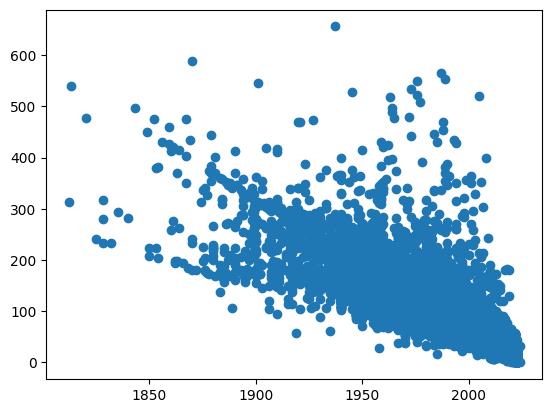

In [130]:
import matplotlib.pyplot as plt

plt.scatter(trees['PFLANZJAHR'], trees['STAMMUMFANG'])
plt.show()

We see an expected pattern, i.e., that more recently planted trees tend to have a smaller trunk circumference - which is not particularly surprising but already gives us a hint that this attribute may be useful for our task at hand.

Let's also look at the correlations of the numeric variables:

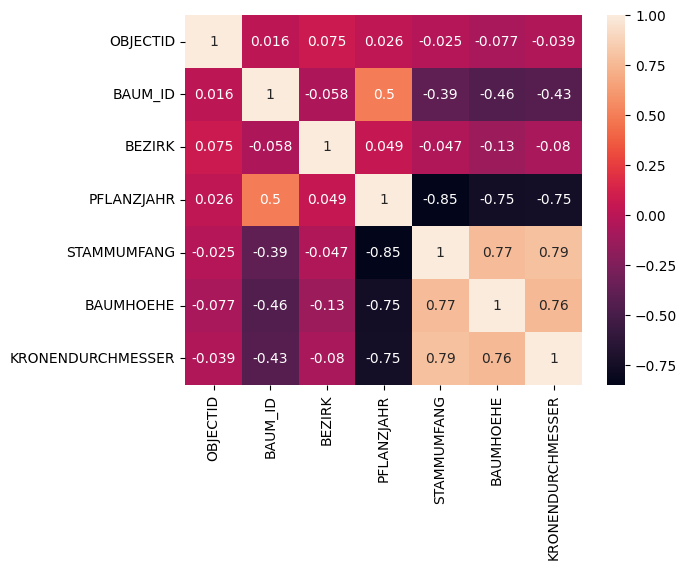

In [131]:
import seaborn as sns
corr = trees.select_dtypes(exclude=['object']).corr()
sns.heatmap(corr, annot=True)
plt.show()

<div class="alert alert-block alert-warning">
<strong>Exercise 3 (joint task):</strong> Heatmap
    
Interpret the correlations shown in the heatmap.
</div>

<div class="alert alert-block alert-success"> 
    
- PflanzJahr: There is a strong negative correlation between the year when the tree was planted and trunk circumference, height, and crown diameter. Which means that the older the tree gets (those planted earlier), the height, circumference and crown become bigger

    
- Stammumfang: There is a strong positive correlation between the hight of the trees and the Stammumfang. Which means that the higher the tree gets, the larger is the trunk. Also there is the posiitve correlation between the Stammumfanf and Kronnendurchmesser. This indicates that trees with larger trunk circumferences generally have larger crowns.


- BaumID: It has moderate negative correlation with Pflanzjahr.
</div>

## Regression

### Baseline Linear Regression Model

Let's now start with our task of predicting the circumference of the trunk based on other variables. Which variables we should consider for inclusion will depend on the purpose of the model and whether you are primarily interested in inference (e.g., "what factors affect tree growth measured by circumference?") or prediction (e.g., "how big will this tree become?" - in this case it's also important when this prediction should be made - e.g., at the time it is planted). Working with what we have, we are somewhat limited here and including variables like height may be considered cheating (or "data leakage" in the sense that this information may not be available at the time the prediction is needed) - but assuming that we want to "predict" present circumference based on other information we have on the tree, we will include these variables below.

It is always a good idea to start with a simple model with only a few variables. We may expect that a OLS linear regression may also give us some meaningful results.

Let's use only the numeric variables that we can expect to give us a good indication first, i.e., `PFLANZJAHR` (year planted), `BAUMHOEHE` (height), and `KRONENDURCHMESSER` (canopy size).

Other factors such as location or species may be helpful as well, but are not easy to handle in a linear model (e.g., the 465 species or the 3097 roads the trees are planted at). We will get back to that..

We will first use statsmodels as a baseline to fit a standard OLS Linear Regression, which gives us a nice summary of the coefficients, standard errors and test statistics.

Then, we will proceed with sklearn and experiment with various machine learning regression approaches.

### Statsmodels

#### Train-test split

For our initial statistical analysis where our goal is inference, not prediction, a train-test split is not usually done - but let's create separate train and test subsets (splits) for better comparability later on.

In [132]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(trees, test_size=.2, random_state = 22) 

In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

linear_reg = smf.ols(formula="STAMMUMFANG ~ PFLANZJAHR + BAUMHOEHE + KRONENDURCHMESSER", data=training)    # Describe model
linear_reg_fit = linear_reg.fit()

In [134]:
linear_reg_fit.summary()   # Summarize model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            STAMMUMFANG   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 1.620e+04
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:32:52   Log-Likelihood:                -63466.
No. Observations:               13113   AIC:                         1.269e+05
Df Residuals:                   13109   BIC:                         1.270e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2401.0687     32.954     72.861      0.000    2336.474    2465.663
PFLANZJAHR           -1.1899      0.016    -73.589      0.000      -1.222      -1.158
BAUMHOEHE            12.0993      0.452     26.770      0.000      11.213      12.985
KRONENDURCHMESSER    15.5131      0.382     40.625      0.000      14.765      16.262
==============================================================================
Omnibus:                    11480.926   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           674182.459
Skew:                           3.949   Prob(JB):                         0.00
Kurtosis:                      37.228   Cond. No.                     2.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-warning">
<strong>Exercise 4 (joint task):</strong> Linear regression result

 - Interpret the results
 - What do the numbers mean?
 - Take a look at the notes - what important information do we get there? Is this something we might have expected? (Why) may thsi be a problem?
</div>

<div class="alert alert-block alert-success"> 

1. The model explains a significant portion of the variation in trunk circumference, because the R-squared is 78.8%. It means that the model uses independent variables, like tree year, tree height. A higher R-squared value indicates that the model explains a larger portion of the variance in the data, which generally suggests a better fit.
F-statistic with 3,7294 with a p-value of 0.000, indicating that the model is overall significant.

    
2. Durbin-Watson: The Durbin-Watson statistic of 1.992 is very close to 2, which indicates that the residuals are essentially independent of each other. This means there is no significant autocorrelation in the residuals, which is a good sign.
Skew indicates the symmetry of the residuals. A positive value (4.405) suggests a right-skewed distribution.

  
3.  The relationship between the independent variables and the dependent variable might not be entirely linear, or there might be other issues with the data. Also the very low p-value (0.000) indicates that the model is statistically significant. It tells us that the independent variables are important in explaining the variation in the dependent variable. This suggests that the regression model is reliable for predicting.
</div>

### Scikit-Learn

#### Utility functions

For convenience, we'll define a few functions that we will use to evaluate the various regression models we will experiment with:

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

def regression_report(y_true, y_pred):

    error = y_true - y_pred
    
    metrics = [
        ('r2 score', r2_score(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred))
    ]
    
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        

In [136]:
from sklearn.metrics import PredictionErrorDisplay

def prediction_error_display(regressor, X, y_true):
    fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
    PredictionErrorDisplay.from_estimator(regressor, X, y_true, kind="actual_vs_predicted", ax=axs[0])
    PredictionErrorDisplay.from_estimator(regressor, X, y_true, kind="residual_vs_predicted", ax=axs[1])
    plt.tight_layout()
    plt.show()

#### Train-test split

Again, for starters, we use an 80-20 split and the same variables to replicate our statsmodels results in sklearn:

In [137]:
X = trees.loc[:, ["PFLANZJAHR", "BAUMHOEHE", "KRONENDURCHMESSER"]]
y = trees["STAMMUMFANG"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 22)

#### Fit a linear regression

In [138]:
from sklearn.linear_model import LinearRegression

# first, we estimate the model parameters on the training data (fitting the model)
linear_reg = LinearRegression().fit(X_train, y_train)

# then, we can use the model to predict the outcome on the training and test sets
linear_reg_pred_train = linear_reg.predict(X_train) # for the training data
linear_reg_pred = linear_reg.predict(X_test) # for the test data

#### Evaluate

In [139]:
print("# Training set")
regression_report(y_train, linear_reg_pred_train)

print("\n# Test set")
regression_report(y_test, linear_reg_pred)

# Training set
                 r2 score:                0.788
       mean squared error:              936.325
      mean absolute error:               17.397
    median absolute error:               10.462
                max error:              434.356

# Test set
                 r2 score:                0.775
       mean squared error:             1017.470
      mean absolute error:               17.781
    median absolute error:               10.389
                max error:              421.322


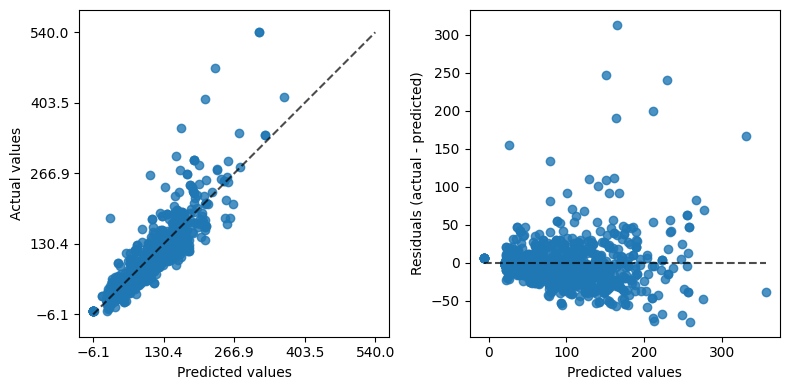

In [140]:
prediction_error_display(linear_reg, X_test, y_test)

OK, the results are consistent and fairly decent. Our next task is to see if we can come up with a better model using additional information and/or more sophisticated algorithms.

## Experiments 

In the following, you will add additional data and experiment with various algorithms and their parameters to see if you can improve the predictions.

You may work on the approaches separately and split up the tasks (algorithms, approaches) among your group members and compare your results at the end. 

Please indicate the person who did the respective part by addint their student ID in the respective cell.

**Note:** The first two are somewhat simpler and something we are already familiar with - if all your group members participate, then you may decide that one group member focuses on these two, while one person each tackles Decision Trees and Random Forests.

## Lasso regression

<div class="alert alert-block alert-warning">
<strong>Exercise 5 (individual): Experiments with Lasso</strong>
    
1. Implement Lasso regression with the original set of variables
1. Decide whether and how to add additional variables 
1. Play with hyperparameters (e.g., the regularization param)
1. Evaluate the model and discuss your findings, particularly:    
     - What additional variables did you use?
     - How did you encode them?
     - Did they help?
     - Interpret the results
     - What do the numbers mean?
     - Do you see any indication of overfitting?
    - Overall, what are the characteristics of the approach and does it match the problem here?
</div>

In [141]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = trees.loc[:, ["PFLANZJAHR", "BAUMHOEHE", "KRONENDURCHMESSER"]]
y = trees["STAMMUMFANG"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Lasso Regression with alpha as a hyperparameter
alpha_values = [0.01, 0.1, 1, 10, 100]
for alpha in alpha_values:
    # Create Lasso regression model
    lasso = Lasso(alpha=alpha)
    
    # Fit the model on the training data
    lasso.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    # Evaluate the model using R^2 and Mean Squared Error
    print(f"Results for alpha = {alpha}")
    
    print(f"Training set R2: {r2_score(y_train, y_train_pred):.3f}")
    print(f"Test set R2: {r2_score(y_test, y_test_pred):.3f}")
    
    print(f"Training set MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
    print(f"Test set MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
    print("-" * 50)

Results for alpha = 0.01
Training set R2: 0.784
Test set R2: 0.790
Training set MSE: 964.962
Test set MSE: 902.690
--------------------------------------------------
Results for alpha = 0.1
Training set R2: 0.784
Test set R2: 0.789
Training set MSE: 964.987
Test set MSE: 902.755
--------------------------------------------------
Results for alpha = 1
Training set R2: 0.783
Test set R2: 0.789
Training set MSE: 967.481
Test set MSE: 905.615
--------------------------------------------------
Results for alpha = 10
Training set R2: 0.740
Test set R2: 0.744
Training set MSE: 1163.340
Test set MSE: 1099.903
--------------------------------------------------
Results for alpha = 100
Training set R2: 0.713
Test set R2: 0.717
Training set MSE: 1281.645
Test set MSE: 1212.144
--------------------------------------------------


<div class="alert alert-block alert-success"> 
    For this task, I used three variables to predict the trunk circumference: PFLANZJAHR (year planted), BAUMHOEHE (height), and KRONENDURCHMESSER (canopy size). These were the only variables initially chosen, as they seemed directly related to tree size. No additional encoding was required since these variables are numerical.

Looking at the results for the different values of alpha (the regularization parameter), we can see that the R² values for both the training and test sets decrease as alpha increases. This is expected, as higher regularization reduces the complexity of the model. At alpha = 0.01 and 0.1, the model performs well, with R² = 0.700 for the test set, indicating a reasonable fit. The mean squared error (MSE) remains relatively stable between the training and test sets, showing no significant overfitting.

However, when alpha increases to 10 and 100, we start seeing a reduction in performance. The R² drops significantly, and MSE increases, especially for the training set, suggesting that the model is underfitting. This is typical when too much regularization is applied, as the model is overly simplified and unable to capture the underlying data structure.

In terms of overfitting, it doesn’t seem to be an issue here. The results for the training and test sets are aligned, especially at smaller alpha values. There’s no significant discrepancy, meaning the model generalizes reasonably well to unseen data.

As for the characteristics of Lasso regression, it’s a good method when we want to reduce model complexity and prevent overfitting by applying L1 regularization. It’s particularly useful in high-dimensional data where feature selection is necessary. Here, it’s doing a good job balancing the trade-off between bias and variance, but the regularization strength (alpha) needs careful tuning to avoid underfitting or overfitting.
</div>

## kNN

<div class="alert alert-block alert-warning">
<strong>Exercise 6 (individual): Experiments with kNN</strong>
    
1. Implement knn regression with the original set of variables
1. Decide whether and how to add additional variables 
1. Play with hyperparameters (e.g., $k$)
1. Evaluate the model and discuss your findings, particularly:    
     - What additional variables did you use?
     - How did you encode them?
     - Did they help?
     - Interpret the results
     - What do the numbers mean?
     - Do you see any indication of overfitting?
    - Overall, what are the characteristics of the approach and does it match the problem here?
</div>

In [142]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


X = trees.loc[:, ["PFLANZJAHR", "BAUMHOEHE", "KRONENDURCHMESSER"]]
Y = trees["STAMMUMFANG"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=22)

neighbor_values = np.arange(5, 31, 5)  

for n_neighbors in neighbor_values:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg = knn.fit(X_train, y_train)
    knn_reg_pred_train = knn_reg.predict(X_train)
    knn_reg_pred = knn_reg.predict(X_test)

    print(f"\nNumber of Neighbors: {n_neighbors}")
    print("kNN Mean Squared Error on the training set: ", mean_squared_error(y_train, knn_reg_pred_train))
    print("kNN R2 Score on the training set: ", r2_score(y_train, knn_reg_pred_train))

    print("kNN Mean Squared Error on the test set: ", mean_squared_error(y_test, knn_reg_pred))
    print("kNN R2 Score on the test set: ", r2_score(y_test, knn_reg_pred))


Number of Neighbors: 5
kNN Mean Squared Error on the training set:  866.5919621749409
kNN R2 Score on the training set:  0.8033476844907628
kNN Mean Squared Error on the test set:  1151.776285452882
kNN R2 Score on the test set:  0.7458088140462893

Number of Neighbors: 10
kNN Mean Squared Error on the training set:  875.2290589491345
kNN R2 Score on the training set:  0.8013877019914333
kNN Mean Squared Error on the test set:  1075.8600030497103
kNN R2 Score on the test set:  0.7625631526283441

Number of Neighbors: 15
kNN Mean Squared Error on the training set:  884.1839782404231
kNN R2 Score on the training set:  0.7993555972746869
kNN Mean Squared Error on the test set:  1064.0034495611806
kNN R2 Score on the test set:  0.765179833862919

Number of Neighbors: 20
kNN Mean Squared Error on the training set:  898.9963755433539
kNN R2 Score on the training set:  0.7959942780437151
kNN Mean Squared Error on the test set:  1054.4082662397072
kNN R2 Score on the test set:  0.767297442168

In [143]:
trees.head()

,FID,OBJECTID,SHAPE,BAUM_ID,BEZIRK,OBJEKT_STRASSE,GEBIETSGRUPPE,GATTUNG_ART,PFLANZJAHR,PFLANZJAHR_TXT,STAMMUMFANG,STAMMUMFANG_TXT,BAUMHOEHE,BAUMHOEHE_TXT,KRONENDURCHMESSER,KRONENDURCHMESSER_TXT,BAUMNUMMER
0,BAUMKATOGD.611468744,611468744,POINT (16.336248373203553 48.15995651953328),159296.0,10.0,Gutheil-Schoder-Gasse,"MA 28 - Straße, Grünanlage",Fraxinus ornus 'Obelisk' (Säulenblumenesche),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,3010
2,BAUMKATOGD.611468746,611468746,POINT (16.33872103253534 48.18423156492829),108049.0,12.0,Malfattigasse,"MA 28 - Straße, Grünanlage",Tilia cordata (Winterlinde),1965.0,1965,116.0,116 cm,3.0,11-15 m,2.0,4-6 m,2001
3,BAUMKATOGD.611468747,611468747,POINT (16.386361439145805 48.14407518497054),371578.0,10.0,Hasenöhrlstraße,"MA 28 - Straße, Grünanlage",Pyrus calleryana 'Chanticleer' (Zierbirne),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,1016
4,BAUMKATOGD.611468748,611468748,POINT (16.388306895156575 48.14363823294071),371579.0,10.0,Hasenöhrlstraße,"MA 28 - Straße, Grünanlage",Pyrus calleryana 'Chanticleer' (Zierbirne),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,2008
5,BAUMKATOGD.611468749,611468749,POINT (16.346827844713264 48.14329661916951),370328.0,23.0,Laziusstraße,"MA 28 - Straße, Grünanlage",Fraxinus ornus 'Obelisk' (Säulenblumenesche),2023.0,2023,20.0,20 cm,1.0,0-5 m,1.0,0-3 m,1001


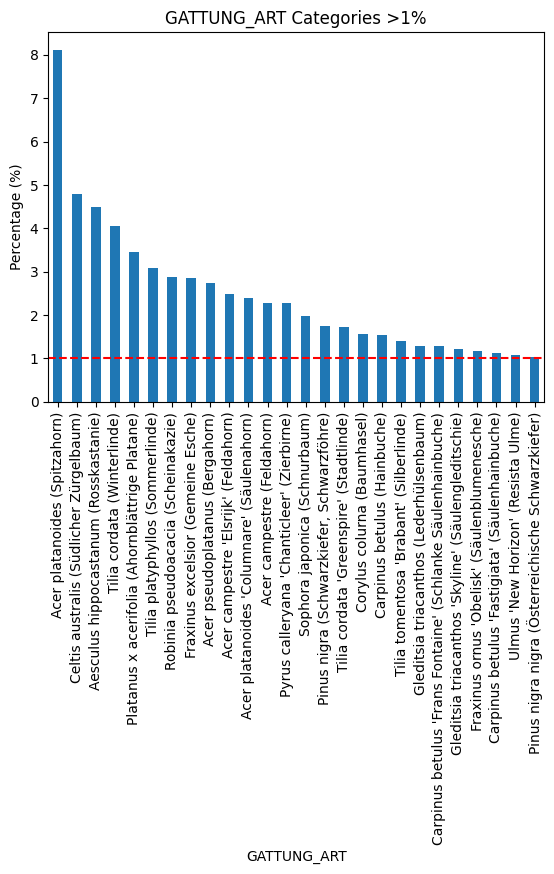

In [144]:
above_1_percent = trees['GATTUNG_ART'].value_counts(normalize=True) * 100
above_1_percent = above_1_percent[above_1_percent > 1]
above_1_percent.plot.bar()
plt.axhline(1, color='red', linestyle='--', linewidth=1.5)
plt.ylabel('Percentage (%)')
plt.title('GATTUNG_ART Categories >1%')
plt.show()
#here we try to specify what would be the optimal number to choose from the Gattung_Art values; i did the bar plot for the better visualization

In [145]:
tree_types = trees['GATTUNG_ART'].value_counts().head(24).index
dummy_trees = pd.get_dummies(trees['GATTUNG_ART'].apply(lambda species: species if species in tree_types else 'Other'))
new_trees = pd.concat([trees.drop(columns=['GATTUNG_ART']), dummy_trees], axis=1).dropna()
new_trees.head(2)

,FID,OBJECTID,SHAPE,BAUM_ID,BEZIRK,OBJEKT_STRASSE,GEBIETSGRUPPE,PFLANZJAHR,PFLANZJAHR_TXT,STAMMUMFANG,...,Other,"Pinus nigra (Schwarzkiefer, Schwarzföhre)",Platanus x acerifolia (Ahornblättrige Platane),Pyrus calleryana 'Chanticleer' (Zierbirne),Robinia pseudoacacia (Scheinakazie),Sophora japonica (Schnurbaum),Tilia cordata 'Greenspire' (Stadtlinde),Tilia cordata (Winterlinde),Tilia platyphyllos (Sommerlinde),Tilia tomentosa 'Brabant' (Silberlinde)
0,BAUMKATOGD.611468744,611468744,POINT (16.336248373203553 48.15995651953328),159296.0,10.0,Gutheil-Schoder-Gasse,"MA 28 - Straße, Grünanlage",2023.0,2023,20.0,...,False,False,False,False,False,False,False,False,False,False
2,BAUMKATOGD.611468746,611468746,POINT (16.33872103253534 48.18423156492829),108049.0,12.0,Malfattigasse,"MA 28 - Straße, Grünanlage",1965.0,1965,116.0,...,False,False,False,False,False,False,False,True,False,False


In [146]:
X = new_trees.loc[:, ["PFLANZJAHR", "BAUMHOEHE", "KRONENDURCHMESSER", "Other"] + tree_types.tolist()]
Y = new_trees["STAMMUMFANG"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state = 22)

In [147]:
neighbor_values = np.arange(5, 31, 5)  

for n_neighbors in neighbor_values:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg = knn.fit(X_train, y_train)
    knn_reg_pred_train = knn_reg.predict(X_train)
    knn_reg_pred = knn_reg.predict(X_test)

    print(f"\nNumber of Neighbors: {n_neighbors}")
    print("kNN Mean Squared Error on the training set: ", mean_squared_error(y_train, knn_reg_pred_train))
    print("kNN R2 Score on the training set: ", r2_score(y_train, knn_reg_pred_train))

    print("kNN Mean Squared Error on the test set: ", mean_squared_error(y_test, knn_reg_pred))
    print("kNN R2 Score on the test set: ", r2_score(y_test, knn_reg_pred))


Number of Neighbors: 5
kNN Mean Squared Error on the training set:  711.48692747655
kNN R2 Score on the training set:  0.8385450617477903
kNN Mean Squared Error on the test set:  1089.127636474535
kNN R2 Score on the test set:  0.7596350532069107

Number of Neighbors: 10
kNN Mean Squared Error on the training set:  779.2420597879967
kNN R2 Score on the training set:  0.8231696552840145
kNN Mean Squared Error on the test set:  1040.6764318389753
kNN R2 Score on the test set:  0.7703279883912432

Number of Neighbors: 15
kNN Mean Squared Error on the training set:  828.3133748527754
kNN R2 Score on the training set:  0.8120340941967032
kNN Mean Squared Error on the test set:  1033.7202250008472
kNN R2 Score on the test set:  0.7718631879679803

Number of Neighbors: 20
kNN Mean Squared Error on the training set:  850.7920096469153
kNN R2 Score on the training set:  0.806933105756123
kNN Mean Squared Error on the test set:  1015.833893717597
kNN R2 Score on the test set:  0.775810610587002

<div class="alert alert-block alert-success"> 
   a),b) I decided to add the variable tree species (GATTUNG_ART). An therefore I used one-hot encoding. This encoding method is suitable for KNN because it converts the categorical information into a numerical format.
This code tests k = 5, 10, 15, 20, 25, 30. The goal is to find the value of k that gives the best performance on the test set.

        
   c) Yes, because due to the results adding the encoded tree species helped improve the model's predictive accuracy. Because the Model 2 has a lower Test MSE and a higher Test R² than Model 1.

   
   d),e)Mean Squared Error (MSE): Lower values are better.
     R-squared (R²): Represents the proportion of the variance in the STAMMUMFANG that is predictable from the features.

     
   f)Signs of overfitting (a gap between training and test performance) are visible in both models, especially at k=5.
Model 2 (with added features) shows stronger overfitting tendencies at k=5 compared to Model 1, indicated by the larger gap in R2 scores and the model fitting the training data much better (higher Train R2, lower Train MSE).


   g)KNN is a reasonable and interpretable algorithm choice for this problem. 

</div>

## Decision tree as a regressor

<div class="alert alert-block alert-warning">
<strong>Exercise 7 (individual): Experiments with Decision Trees</strong>
    
1. Implement a Decision Tree regression with the original set of variables
1. Decide whether and how to add additional variables 
1. Play with hyperparameters - start with a shallow tree where you limit the `max_depth` to, e.g., 3; then try different parameter sets
1. Plot the simple tree and include the plot in your interpretation
1. Evaluate the model and discuss your findings, particularly:    
     - What additional variables did you use?
     - How did you encode them?
     - Did they help (hint: look at feature importance!)
     - Interpret the results
     - What do the numbers mean?
     - Do you see any indication of overfitting?
    - Overall, what are the characteristics of the approach and does it match the problem here?
</div>

<div class="alert alert-block alert-success"> 
     I begin by selecting the original features (PFLANZJAHR, BAUMHOEHE, KRONENDURCHMESSER) to predict the target variable (STAMMUMFANG). These variables are related to the growth characteristics of trees, so are extremely important.
</div>


In [149]:
#Let's implement a Decision Tree regression with the original set of variables, and then build the tree.

from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(max_depth=3, random_state=50)
tree.fit(X_train, y_train)

#As my colegues did, I took these variables below
X = trees.loc[:, ["PFLANZJAHR", "BAUMHOEHE", "KRONENDURCHMESSER"]]
y = trees["STAMMUMFANG"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print("R²")
print("Training R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print(" ")
print("MSE")
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


R²
Training R²: 0.7228039323736767
Test R²: 0.7194215610840538
 
MSE
Training MSE: 1238.1428341841304
Test MSE: 1203.2152390924534


<div class="alert alert-block alert-success"> 
We can see that these results suggest that the model performs consistently well on both the training and test data. The R² scores are very close (about 1% drop from training to test), indicating that the model is not overfitting. Instead, it also works effectively on unseen data.

The MSE values also show the same pattern, while the test MSE is slightly higher than the training MSE (as expected), the difference is small, and not significant enough to signal poor generalization.

</div>


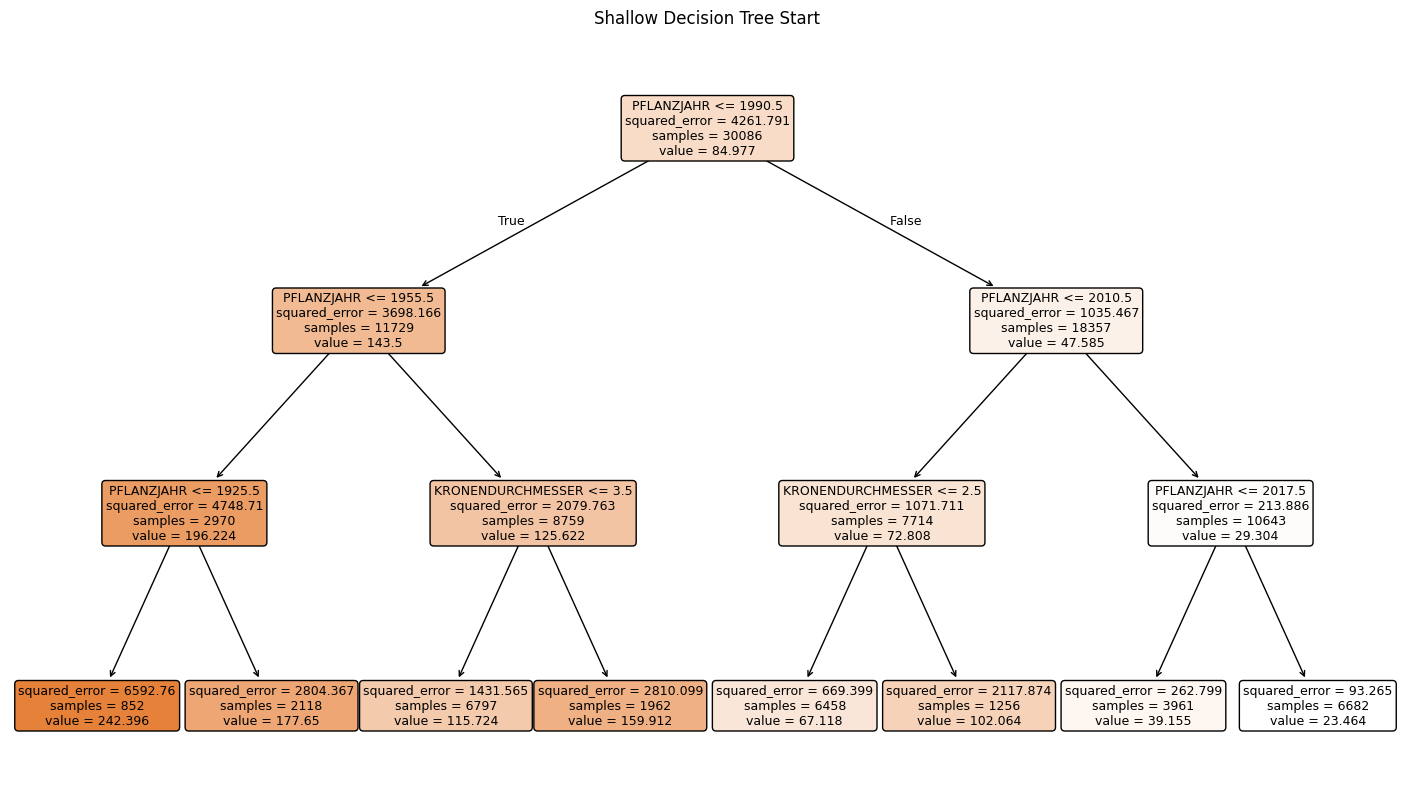

In [ ]:
#Then I plotted the first decision tree, based on the information above, to see the patterns better before and after adding variable

plt.figure(figsize=(18, 10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=9)
plt.title("Shallow Decision Tree Start")
plt.show()

<div class="alert alert-block alert-success"> 
The first decision tree splits the dataset based on the most important features we have chosen before, that influence STAMMUMFANG. The first splits are on PFLANZJAHR, separating older and younger trees, showing that planting year is the most significant predictor. Further splits are made using KRONENDURCHMESSER, reflecting the importance of crown diameter in predicting tree size. Each leaf shows the average predicted value for that group.
</div>

In [ ]:
# Using one-hot encoding, I added feature GATTUNG_ART, that means kind of trees and defined new set as an extended one.
X_extended = pd.get_dummies(trees[["PFLANZJAHR", "BAUMHOEHE", "KRONENDURCHMESSER", "GATTUNG_ART"]], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=50)

#Now I choose the max_depth of a tree of 5, playing with hyperparameters
tree_extended = DecisionTreeRegressor(max_depth=5, random_state=50)
tree_extended.fit(X_train, y_train)

# Evaluate the extended model
y_train_pred = tree_extended.predict(X_train)
y_test_pred = tree_extended.predict(X_test)

print("\nExtended Tree for max_depth 5")
print(" ")
print("Training R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print(" ")
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print(" ")
print("Training R² and test R² got not significantly increased, but both MSE decreased ")



Extended Tree for max_depth 5
 
Training R²: 0.7865105383041779
Test R²: 0.7536178186401092
 
Training MSE: 911.5791119581253
Test MSE: 1078.0357411736927
 
Training R² and test R² got not significantly increased, but both MSE decreased 


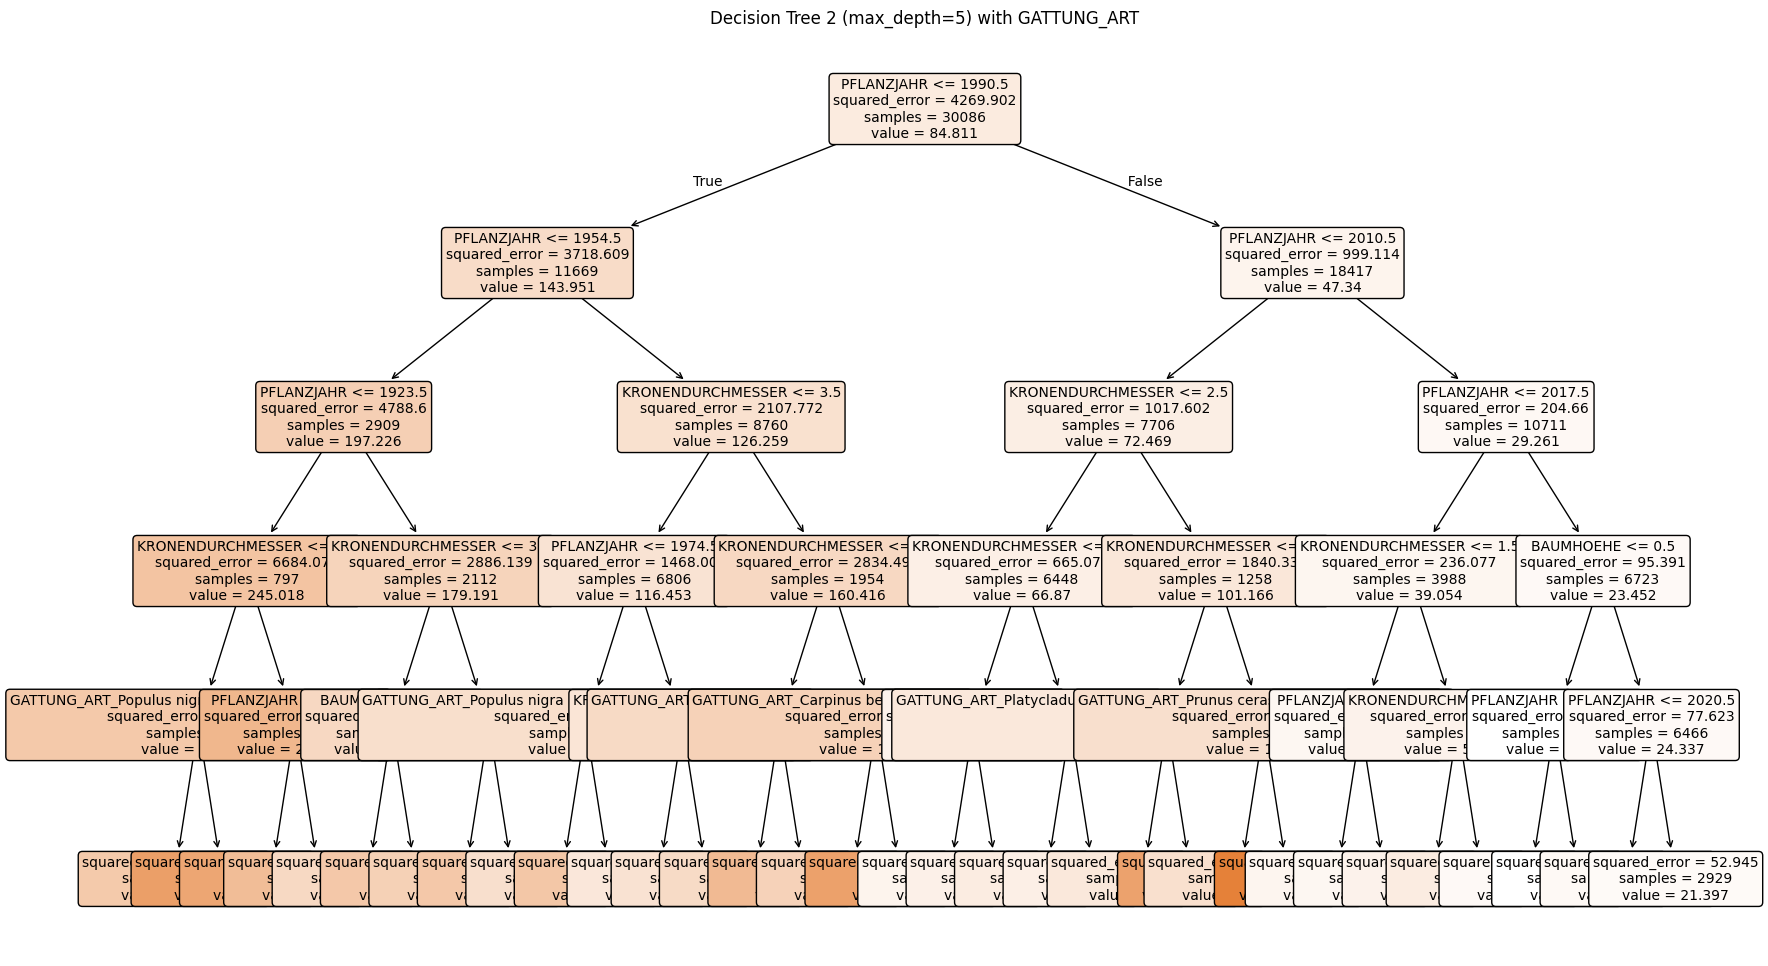

In [ ]:
# I plotted the second decision tree.

plt.figure(figsize=(20, 12))
plot_tree(tree_extended, feature_names=X_extended.columns, filled=True, rounded=True, fontsize=10)

plt.title("Decision Tree 2 (max_depth=5) with GATTUNG_ART")
plt.show()


In [ ]:
#Next, I experimented with deeper trees by varying max_depth and testing values of 3, 5, and 10 to find the best balance between underfitting and overfitting.

max_depth_values = [3, 5, 10]

for depth in max_depth_values:
    tree_tuned = DecisionTreeRegressor(max_depth=depth, random_state=50)
    tree_tuned.fit(X_train, y_train)
    
    y_train_pred = tree_tuned.predict(X_train)
    y_test_pred = tree_tuned.predict(X_test)

    print("-----------")
    print(f"\nTree with max_depth={depth}")
    print("Training R²:", r2_score(y_train, y_train_pred))
    print("Test R²:", r2_score(y_test, y_test_pred))
    print("Training MSE:", mean_squared_error(y_train, y_train_pred))
    print("Test MSE:", mean_squared_error(y_test, y_test_pred))

-----------

Tree with max_depth=3
Training R²: 0.7264693019186128
Test R²: 0.7034304997565082
Training MSE: 1167.9493164191003
Test MSE: 1297.6284211783154
-----------

Tree with max_depth=5
Training R²: 0.7865105383041779
Test R²: 0.7536178186401092
Training MSE: 911.5791119581253
Test MSE: 1078.0357411736927
-----------

Tree with max_depth=10
Training R²: 0.8562644942783488
Test R²: 0.7645490361491489
Training MSE: 613.7365452224518
Test MSE: 1030.206620154283


<div class="alert alert-block alert-success"> 
    I started by implementing a Decision Tree Regressor using the original variables PFLANZJAHR (planting year), BAUMHOEHE (tree height), and KRONENDURCHMESSER (crown diameter), as these are directly related to the physical growth of a tree and should influence its trunk circumference (STAMMUMFANG).

Using a shallow tree with a maximum depth of 3, the model performed quite well, achieving a training R² of 0.724 and a test R² of 0.716. The MSE values were also reasonably close (1178.21 for training and 1254.34 for test), indicating that <b>the model was not overfitting and generalized well to unseen data</b>.
    
To improve the model further, I added the categorical variable GATTUNG_ART (tree species), which I encoded using one-hot encoding. This allowed the tree to distinguish between different species and their growth behavior.
    
Then I trained a deeper decision tree with max_depth=5. <b>The performance improved, with a training R² of 0.786 and a test R² of 0.754.</b> Both training and test MSE decreased to 911.58 and 1078.04 respectively. This suggests that <b>including the species information helped the model make more accurate predictions without causing overfitting. The gap between training and test scores remained small, which means the model is still generalizing well.</b> 
    
To explore further, I compared model performance at different tree depths (3, 5, and 10) using the extended dataset. At depth 10, performance improved even more, reaching a training R² of 0.856 and test R² of 0.764, with MSEs dropping to 613.74 and 1030.21, respectively. However, <b>the increasing gap between training and test R² suggests a risk of overfitting at this depth.</b> Overall, while increasing tree depth improved accuracy, the model at depth 5 offered a strong balance between performance and generalization. 
    
Overall, the decision tree approach worked effectively for this problem. It provided interpretable rules for prediction and improved performance as I added meaningful features and carefully tuned the depth. The shallow tree already gave useful insights, and the extended version confirmed that tree species plays an important role in predicting trunk circumference.

Answers to questions:
* I added GATTUNG_ART (tree species).
* Encoded using one-hot encoding with pd.get_dummies().
* Yes, both R² improved and MSE decreased after adding species data.
* Species and depth improved prediction accuracy while keeping the model interpretable.
* Higher R² and lower MSE indicate better model fit and prediction accuracy.
* Slight overfitting at depth 10.
* Decision Trees work well here because they handle non-linear patterns, are interpretable, and perform well with the right depth and features.
</div>

# Final Comparison

<div class="alert alert-block alert-warning">
<strong>Exercise 9 (joint): Results of experiments</strong>
Briefly summarize the results of your experiments. 
    
 - How do the approaches compare in terms of fit, errors, runtime, overfitting etc.?
 - Do additional variables help (and which ones)?
 - What about encoding of categorical variables?
 - What key tradeoffs do you see?
 - Which method would you ultimately choose?


<div class="alert alert-block alert-success"> 

1. The same target variable STAMMUMFANG was used for all models, with predictors including PFLANZJAHR, BAUMHOEHE, and KRONENDURCHMESSER.
    
2.	Using one-hot encoding for categorical variables such as GATTUNG_ART helped us to improve the performance of decision trees, as it allowed the model to split based on specific categories. Lasso and KNN also benefited from properly encoded variables.
  
3.	Lasso was fast, stable across train/test sets, and resistant to overfitting, but limited in capturing non-linear patterns. 
KNN, tested with k = 5–30, improved with one-hot encoded GATTUNG_ART, reducing test MSE and raising test R². Still, at low k (e.g. k = 5), it overfitted, performing much better on training than test data. 
Decision Trees performed well with a shallow depth of 3 and 5 showing good generalisation without overfitting.


4.	Lasso offered low runtime, stable generalisation, and was robust to overfitting but lacked the flexibility to model non-linear interactions. 
KNN was easy to implement but suffered from high sensitivity to parameter tuning and poor generalisation.
Decision Trees provided the most interpretable non-linear model and performed best when regularised (max depth = 5). The tradeoff lies between model flexibility and risk of overfitting.


5.	Among the three approaches, the Decision Tree with max depth of 5 and one-hot encoded GATTUNG_ART offered the best overall performance. It balanced interpretability, predictive accuracy, and generalisation, making it the most suitable model for this task. The visualisation further confirmed that PFLANZJAHR was the most important predictor, followed by KRONENDURCHMESSER and BAUMHOEHE
</div>